In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This dataset contains the details of passengers in which both numerical and categorical data are present.Here 'Survived' is the target variable which contains binary value so it will be terms of Logical Regression problem where we need to predict the several Survived using logical model.

EDA(Exploratory Data Analysis)

In [5]:
df.shape

(891, 12)

This dataset contains 891 rows and 12 columns,out of which 1 target variable and remaining 11 are independent variables.

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see there is nan values in age,cabin,embarked columns.in this age as continous value so we replace nan values with mean methodd.

In [11]:
np.mean(df['Age'])

29.69911764705882

In [13]:
print('the mean value:',df['Age'].mean())

the mean value: 29.69911764705882


In [14]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode())

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

In [19]:
df['Cabin'].mode()

0    B96 B98
1         G6
Name: Cabin, dtype: object

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: >

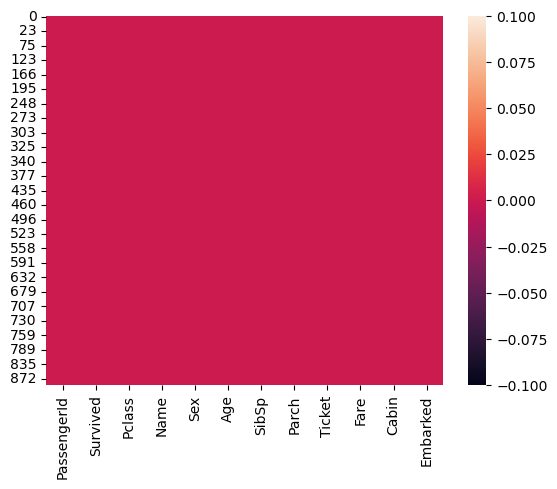

In [25]:
sns.heatmap(df.isnull())

Now we can see there is no Missing/Nan values in any of the columns.

seperating Numerical and Categorical columns.

In [27]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('cat_col:',cat_col)
print('\n')
                    

cat_col: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']




In [29]:
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('num_col:',num_col)
print('\n')

num_col: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']




checking the unique value in eachcolumns

In [31]:
df.nunique().to_frame('number of unique values')

,number of unique values
PassengerId,204
Survived,2
Pclass,3
Name,204
Sex,2
Age,64
SibSp,4
Parch,4
Ticket,143
Fare,101


In [33]:
df['Survived'].unique()

array([0, 1], dtype=int64)

we can assume that '0' means No and '1' means 'Yes'

there are unique values present inthe passenger id dataset has maximum of unique id to the passangers which can be dropped.

In [34]:
df.drop('PassengerId',axis=1,inplace=True)

Description of Dataset

In [35]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.661765,1.215686,35.003447,0.446078,0.436275,75.431577
std,0.474273,0.554914,14.956107,0.629359,0.729976,74.697940
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,28.312500
50%,1.000000,1.000000,33.000000,0.000000,0.000000,54.050000
75%,1.000000,1.000000,46.250000,1.000000,1.000000,89.328150
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


This gives the stastical information of the numerical columns.the summary of the above dataset looks perfect.since there is no negative /invalid values present.
here Mean is lessthan Median means left skwness.
and 75 ht percentile and Max values are same so there is no outliers are present.


Data Visulization.
Univariant Analysis.

1    135
0     69
Name: Survived, dtype: int64


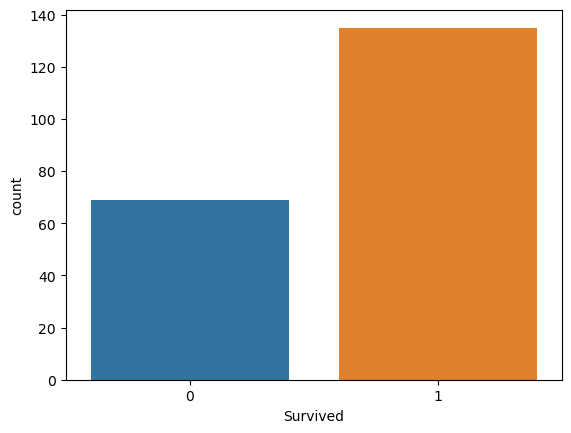

In [37]:
ax=sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())
plt.show()

we can observed that the count of 'survived''yes'are high compaired to 'no'This leads to imbalance issue in the data we will rectify it by using Oversampling method in later stage.

1    174
2     16
3     14
Name: Pclass, dtype: int64


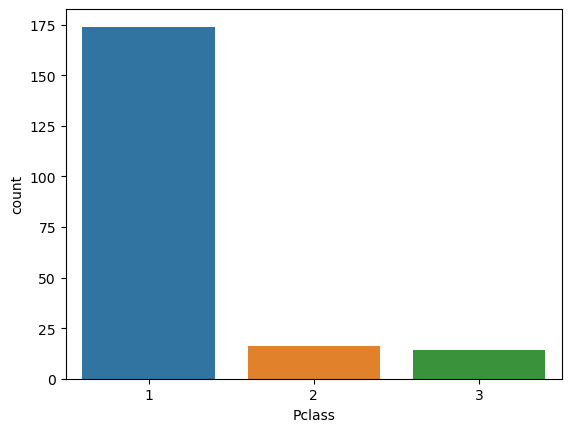

In [38]:
print(df['Pclass'].value_counts())
ax=sns.countplot(x='Pclass',data=df)
plt.show()

Braund, Mr. Owen Harris                                     1
Kimball, Mr. Edwin Nelson Jr                                1
Flynn, Mr. John Irwin ("Irving")                            1
Silvey, Mrs. William Baird (Alice Munger)                   1
Thayer, Mrs. John Borland (Marian Longstreth Morris)        1
                                                           ..
Wick, Miss. Mary Natalie                                    1
Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)    1
Young, Miss. Marie Grice                                    1
Ball, Mrs. (Ada E Hall)                                     1
Behr, Mr. Karl Howell                                       1
Name: Name, Length: 204, dtype: int64


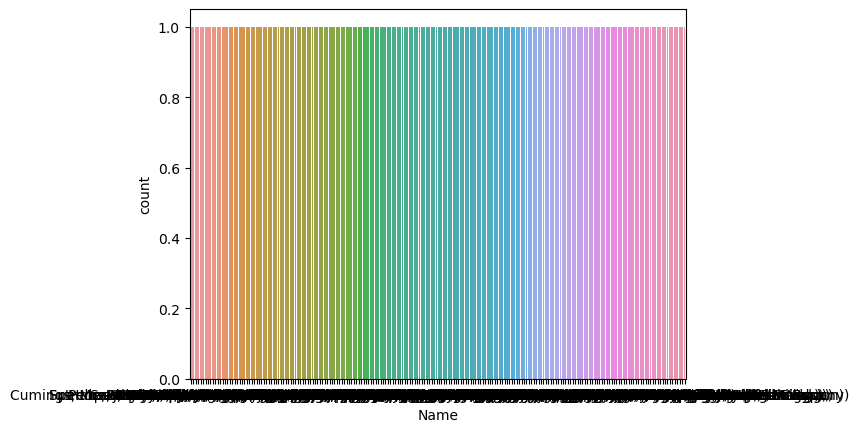

In [39]:
print(df['Name'].value_counts())
ax=sns.countplot(x='Name',data=df)
plt.show()

male      108
female     96
Name: Sex, dtype: int64


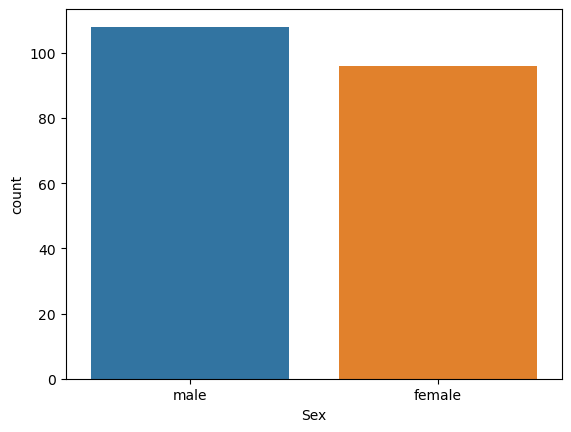

In [40]:
print(df['Sex'].value_counts())
ax=sns.countplot(x='Sex',data=df)
plt.show()

29.699118    19
36.000000    11
24.000000     9
35.000000     6
19.000000     6
             ..
41.000000     1
45.500000     1
63.000000     1
32.500000     1
11.000000     1
Name: Age, Length: 64, dtype: int64


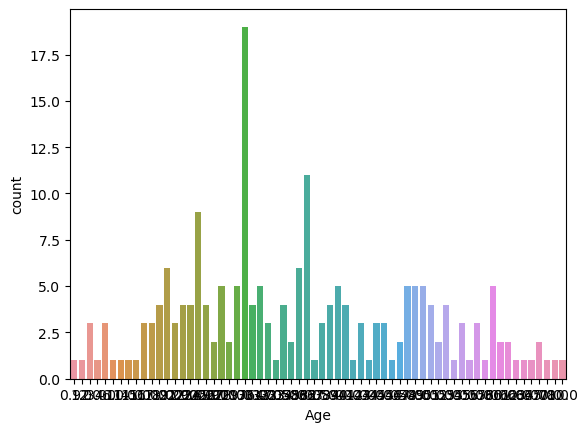

In [41]:
print(df['Age'].value_counts())
ax=sns.countplot(x='Age',data=df)
plt.show()

0    125
1     70
2      6
3      3
Name: SibSp, dtype: int64


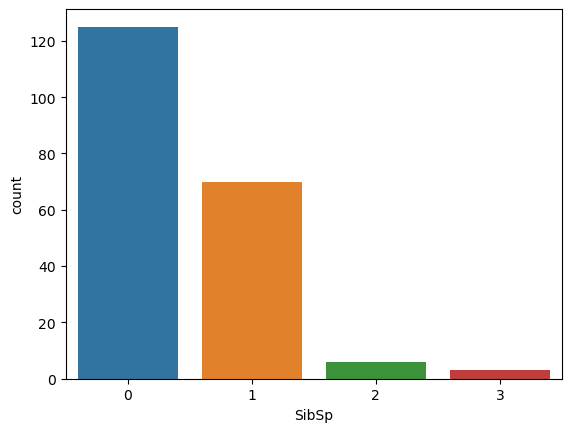

In [44]:
print(df['SibSp'].value_counts())
ax=sns.countplot(x='SibSp',data=df)
plt.show()

0    141
1     39
2     23
4      1
Name: Parch, dtype: int64


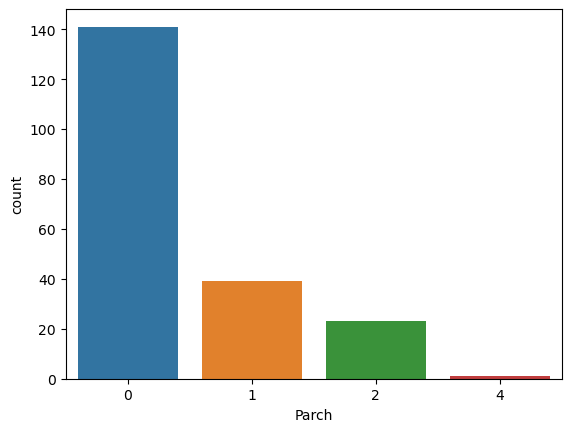

In [45]:
print(df['Parch'].value_counts())
ax=sns.countplot(x='Parch',data=df)
plt.show()

113760      4
19950       4
PC 17572    3
24160       3
113781      3
           ..
28551       1
36928       1
226593      1
19988       1
111369      1
Name: Ticket, Length: 143, dtype: int64


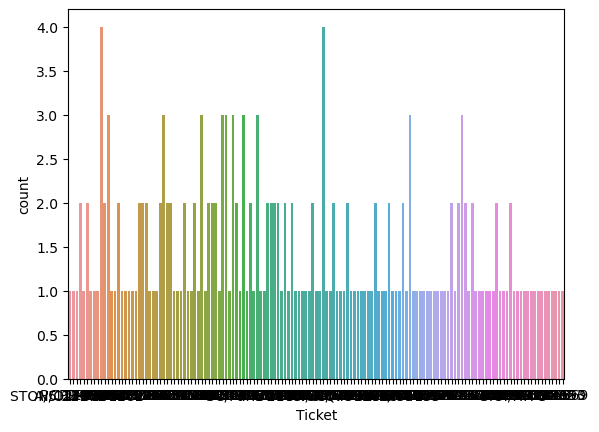

In [46]:
print(df['Ticket'].value_counts())
ax=sns.countplot(x='Ticket',data=df)
plt.show()

26.5500     8
30.0000     5
53.1000     5
52.0000     5
30.5000     4
           ..
55.4417     1
211.5000    1
8.0500      1
81.8583     1
5.0000      1
Name: Fare, Length: 101, dtype: int64


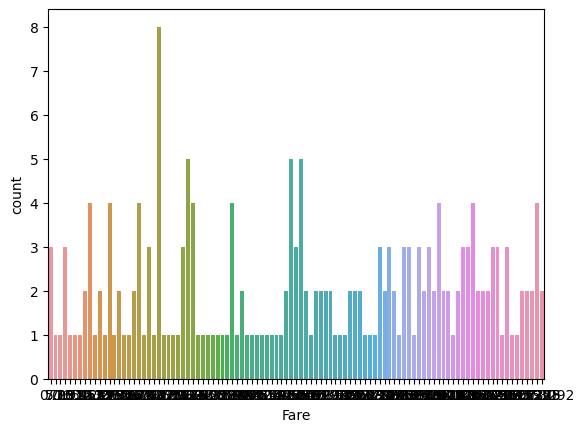

In [47]:
print(df['Fare'].value_counts())
ax=sns.countplot(x='Fare',data=df)
plt.show()

B96 B98        5
G6             5
C23 C25 C27    4
F2             3
E101           3
              ..
C82            1
E50            1
D10 D12        1
D37            1
C148           1
Name: Cabin, Length: 146, dtype: int64


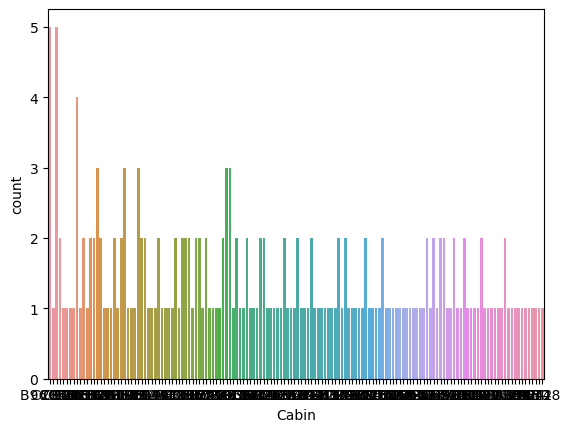

In [48]:
print(df['Cabin'].value_counts())
ax=sns.countplot(x='Cabin',data=df)
plt.show()

S    131
C     69
Q      4
Name: Embarked, dtype: int64


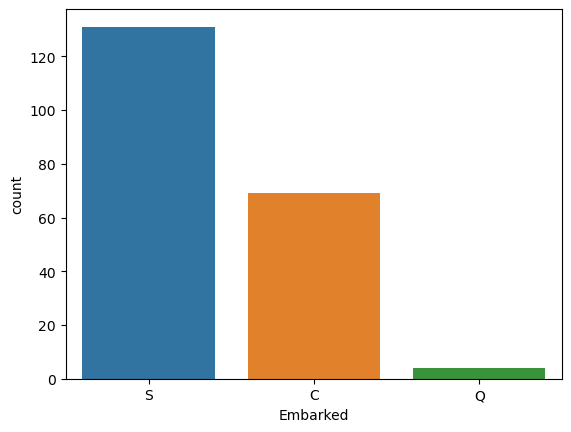

In [49]:
print(df['Embarked'].value_counts())
ax=sns.countplot(x='Embarked',data=df)
plt.show()

Bivariante Analysis(means considering two columns)

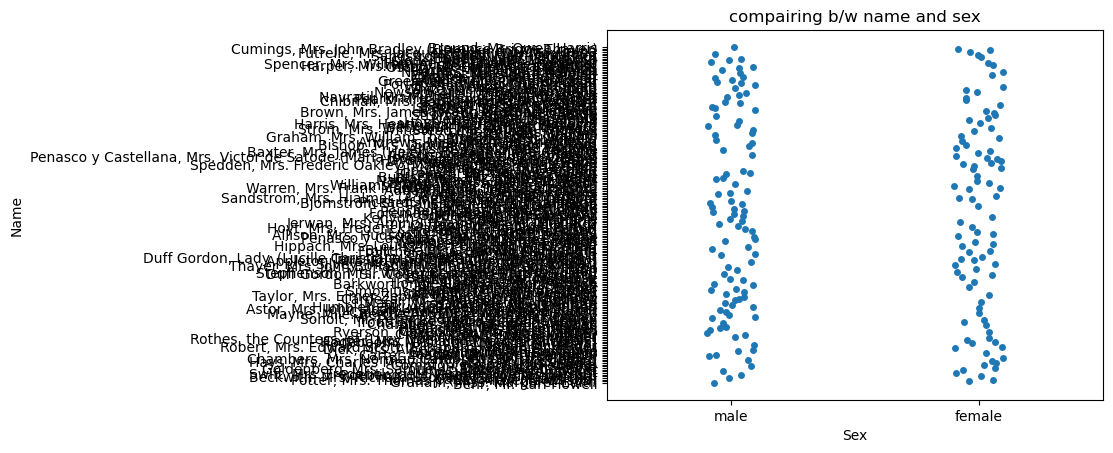

In [51]:
plt.title('compairing b/w name and sex')
sns.stripplot(x='Sex',y='Name',data=df)
plt.show()

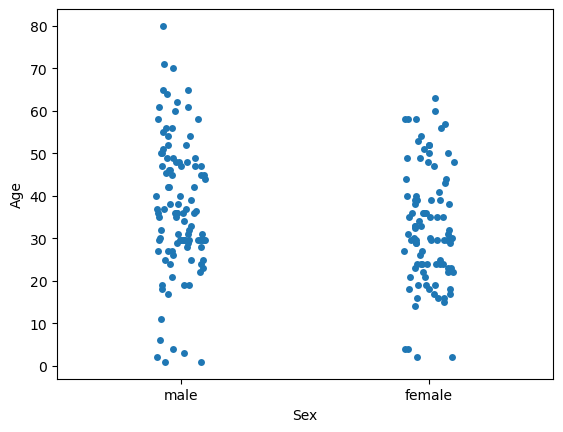

In [52]:
sns.stripplot(x='Sex',y='Age',data=df)
plt.show()

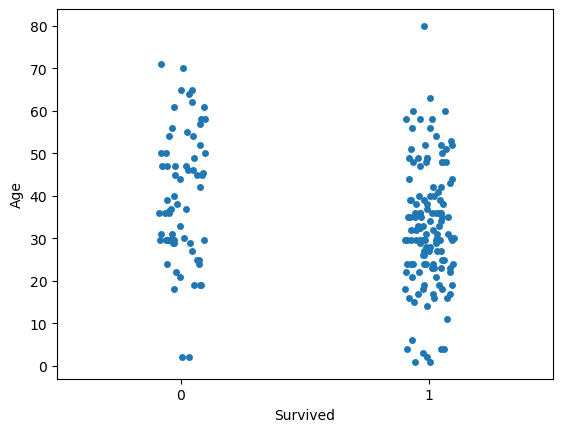

In [53]:
sns.stripplot(x='Survived',y='Age',data=df)
plt.show()

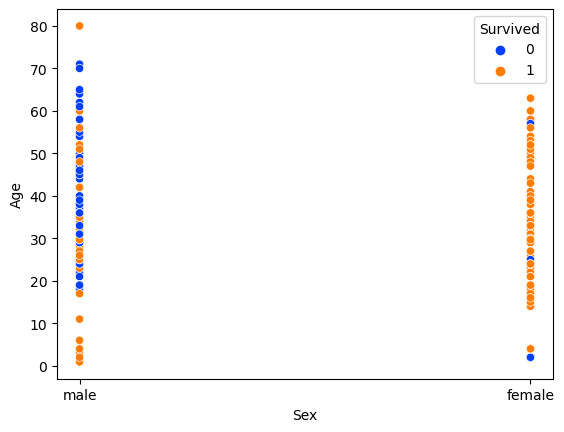

In [54]:
sns.scatterplot(x='Sex',y='Age',data=df,hue='Survived',palette='bright')
plt.show()

Multivariante Analysis

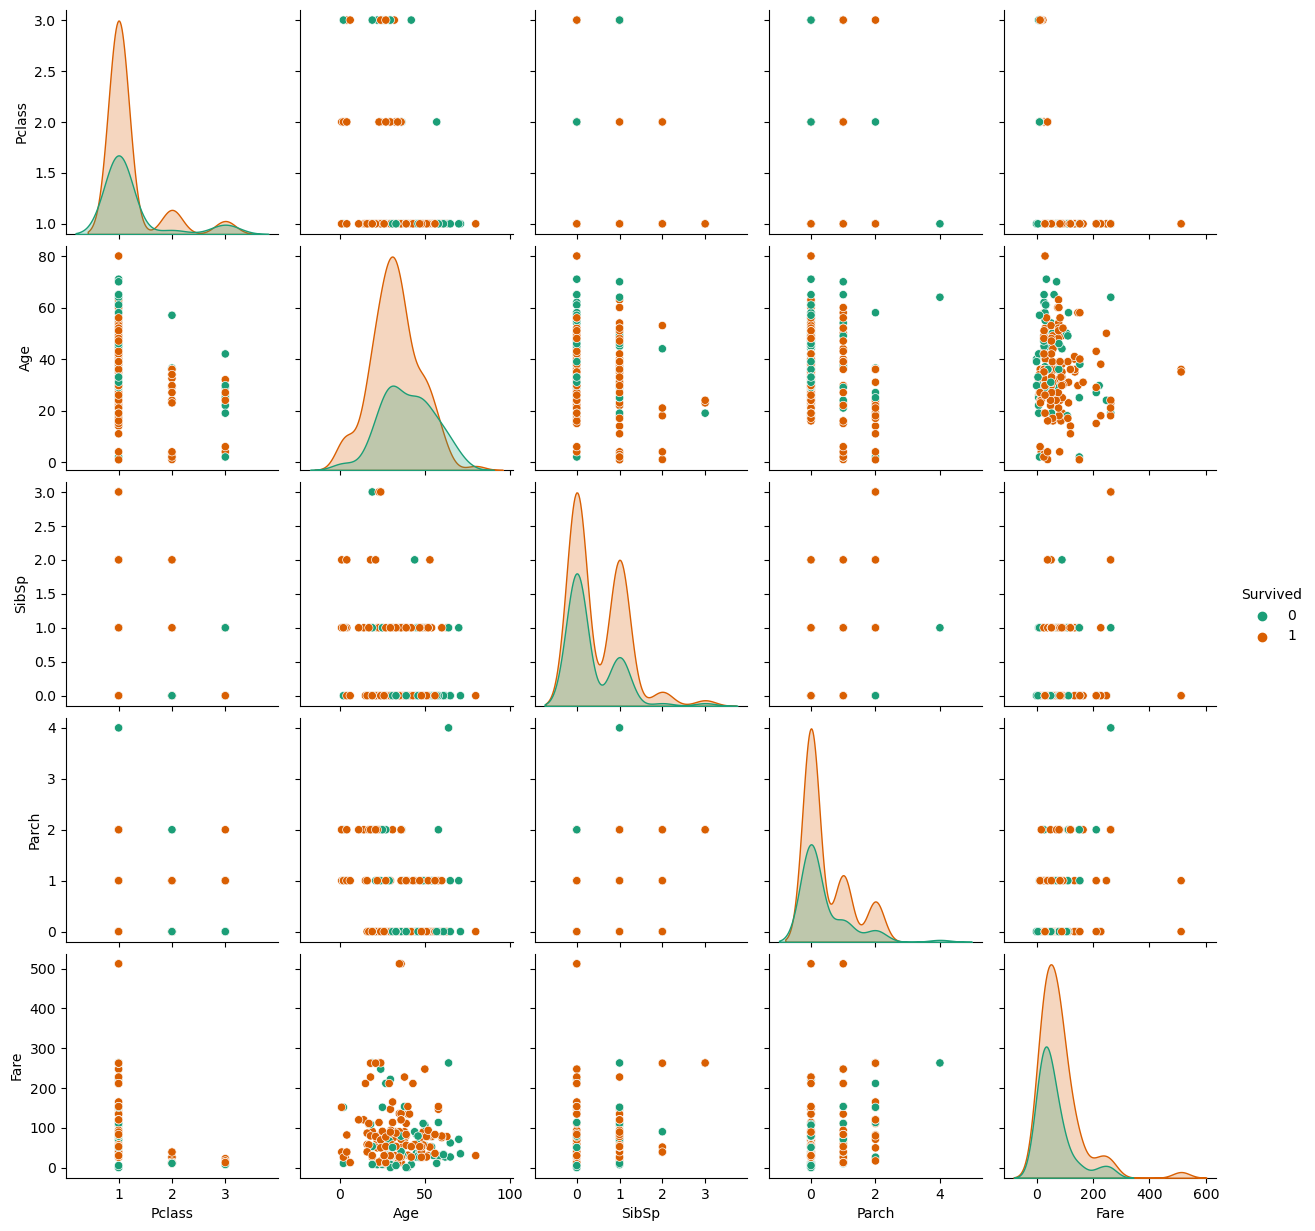

In [56]:
sns.pairplot(df,hue='Survived',palette='Dark2')
plt.show()

Survived       Axes(0.125,0.53;0.110714x0.35)
Pclass      Axes(0.257857,0.53;0.110714x0.35)
Age         Axes(0.390714,0.53;0.110714x0.35)
SibSp       Axes(0.523571,0.53;0.110714x0.35)
Parch       Axes(0.656429,0.53;0.110714x0.35)
Fare        Axes(0.789286,0.53;0.110714x0.35)
dtype: object

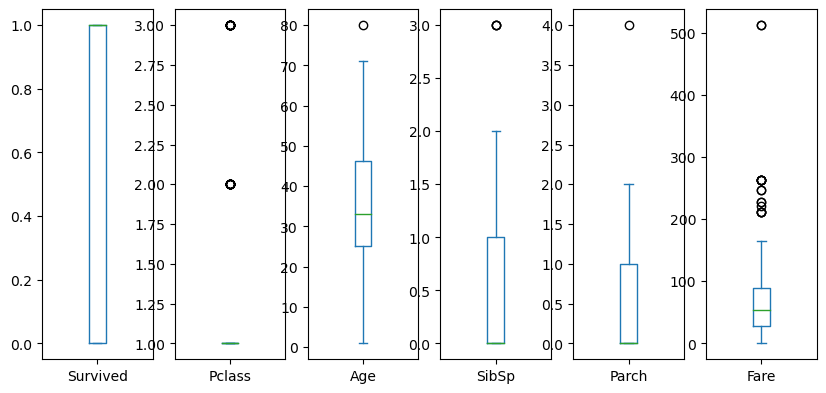

In [57]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

Encoding technique is using here to change categorical data to numerical data.

In [63]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,29.0,1.0,22.0,1,0,103.0,7.2500,46.0,2.0
1,1,1,52.0,0.0,38.0,1,0,124.0,71.2833,80.0,0.0
2,1,3,96.0,0.0,26.0,0,0,140.0,7.9250,144.0,2.0
3,1,1,75.0,0.0,35.0,1,0,36.0,53.1000,54.0,2.0
6,0,1,124.0,1.0,54.0,0,0,62.0,51.8625,128.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,18.0,0.0,47.0,1,1,38.0,52.5542,101.0,2.0
872,0,1,36.0,1.0,33.0,0,0,102.0,5.0000,33.0,2.0
879,1,1,153.0,0.0,56.0,0,1,43.0,83.1583,69.0,0.0
887,1,1,81.0,0.0,19.0,0,0,10.0,30.0000,29.0,2.0


In [64]:
df.skew()

Survived   -0.688913
Pclass      2.489425
Name        0.000000
Sex        -0.118726
Age         0.134753
SibSp       1.462601
Parch       1.643242
Ticket     -0.027983
Fare        2.732662
Cabin       0.001998
Embarked   -0.642643
dtype: float64

Here the columns Pclass,Sibsip,Parch,Fare,Embarked have a skewness in the data since Embarked as categorical data no need to remove skewness since Fare is continous in nature lets use cuberoot to remove skewness.

In [65]:
df['Fare']=np.cbrt(df['Fare'])

In [66]:
df.skew()

Survived   -0.688913
Pclass      2.489425
Name        0.000000
Sex        -0.118726
Age         0.134753
SibSp       1.462601
Parch       1.643242
Ticket     -0.027983
Fare        0.210755
Cabin       0.001998
Embarked   -0.642643
dtype: float64

<Axes: xlabel='Fare', ylabel='Density'>

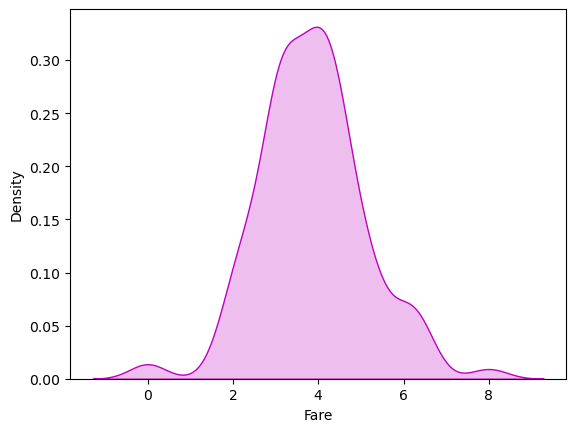

In [68]:
sns.distplot(df['Fare'],color='m',kde_kws={'shade':True},hist=False)

This looks almost normal and skewness is also removed.

To chech correlation of Target and Independent variable

In [69]:
cor=df.corr()
cor

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.039637,-0.131518,-0.549484,-0.225951,0.128388,0.044151,0.061907,0.193485,0.048662,-0.132264
Pclass,-0.039637,1.000000,0.157443,-0.058443,-0.294792,-0.079376,0.034098,0.287094,-0.479664,0.478847,0.184443
Name,-0.131518,0.157443,1.000000,0.019512,0.039646,-0.148300,-0.010917,0.024477,-0.093948,0.140688,-0.025617
Sex,-0.549484,-0.058443,0.019512,1.000000,0.165183,-0.143548,-0.109482,-0.099118,-0.198512,-0.094454,0.095635
Age,-0.225951,-0.294792,0.039646,0.165183,1.000000,-0.140726,-0.241427,-0.016617,-0.032292,-0.126054,-0.095360
SibSp,0.128388,-0.079376,-0.148300,-0.143548,-0.140726,1.000000,0.260547,0.002639,0.364353,0.047387,0.002843
Parch,0.044151,0.034098,-0.010917,-0.109482,-0.241427,0.260547,1.000000,-0.023990,0.386979,-0.001431,0.056798
Ticket,0.061907,0.287094,0.024477,-0.099118,-0.016617,0.002639,-0.023990,1.000000,0.132204,0.164544,-0.248050
Fare,0.193485,-0.479664,-0.093948,-0.198512,-0.032292,0.364353,0.386979,0.132204,1.000000,-0.254000,-0.285915
Cabin,0.048662,0.478847,0.140688,-0.094454,-0.126054,0.047387,-0.001431,0.164544,-0.254000,1.000000,0.232342


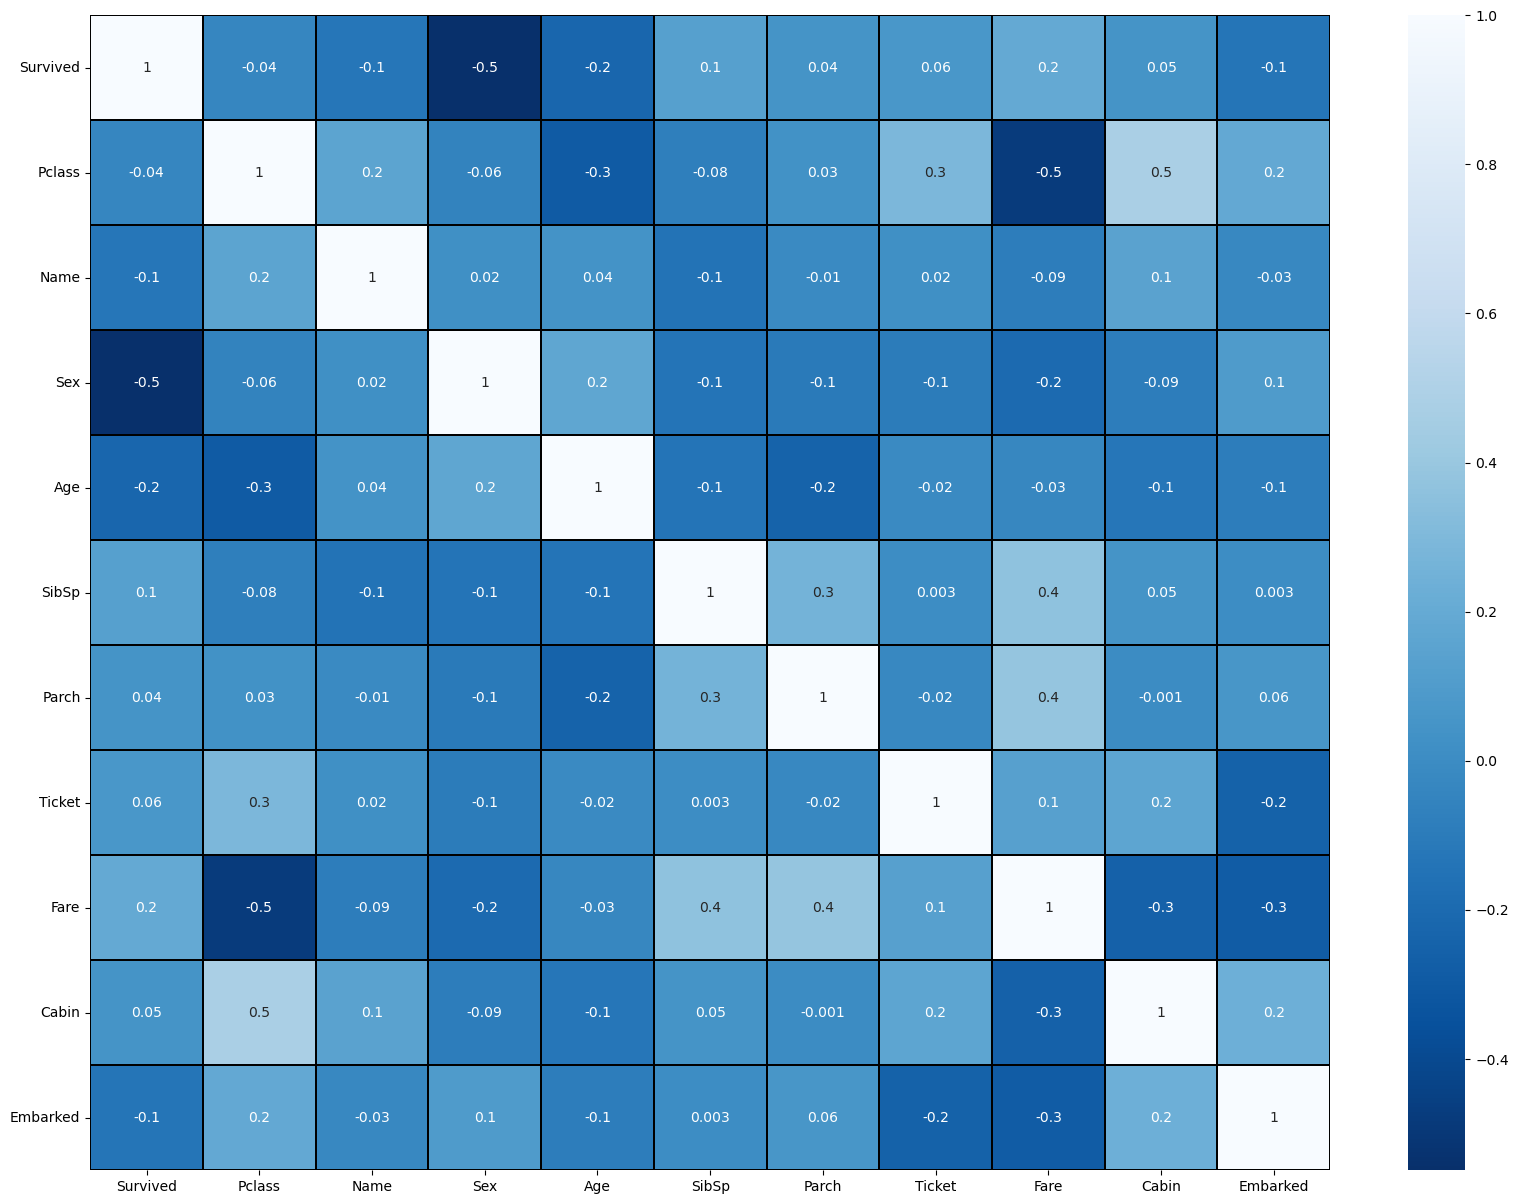

In [79]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                    

In [80]:
cor['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.193485
SibSp       0.128388
Ticket      0.061907
Cabin       0.048662
Parch       0.044151
Pclass     -0.039637
Name       -0.131518
Embarked   -0.132264
Age        -0.225951
Sex        -0.549484
Name: Survived, dtype: float64

Seperating Features and Label

In [83]:
x=df.drop('Survived',axis=1)

In [84]:
y=df['Survived']

Feature scaling.

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3.223385,-1.231129,0.942809,-0.871579,0.882301,-0.599126,0.777916,-1.547383,-0.712235,0.738662
1,-0.389640,-0.840564,-1.060660,0.200849,0.882301,-0.599126,1.291097,0.235574,0.098941,-1.383691
2,3.223385,-0.093396,-1.060660,-0.603472,-0.710526,-0.599126,1.682092,-1.500373,1.625861,0.738662
3,-0.389640,-0.449999,-1.060660,-0.000231,0.882301,-0.599126,-0.859374,-0.077063,-0.521370,0.738662
4,-0.389640,0.382075,0.942809,1.273278,-0.710526,-0.599126,-0.224007,-0.100795,1.244131,0.738662
...,...,...,...,...,...,...,...,...,...,...
199,-0.389640,-1.417921,-1.060660,0.804091,0.882301,0.774152,-0.810499,-0.087484,0.599961,0.738662
200,-0.389640,-1.112262,0.942809,-0.134285,-0.710526,-0.599126,0.753479,-1.729206,-1.022391,0.738662
201,-0.389640,0.874526,-1.060660,1.407332,-0.710526,0.774152,-0.688314,0.411802,-0.163498,-1.383691
202,-0.389640,-0.348112,-1.060660,-1.072660,-0.710526,-0.599126,-1.494740,-0.602393,-1.117823,0.738662


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Feature']=x.columns
vif

,vif values,Feature
0,2.260866,Pclass
1,1.070170,Name
2,1.106813,Sex
3,1.226847,Age
4,1.250147,SibSp
5,1.390671,Parch
6,1.388464,Ticket
7,2.316189,Fare
8,1.393026,Cabin
9,1.259343,Embarked


In [89]:
y.value_counts()

1    135
0     69
Name: Survived, dtype: int64

Here we can observe thata data is not balanced since it is Logical regression model we are not using Smote or oversampling method here.

In [118]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [119]:
y.value_counts()

1    135
0     69
Name: Survived, dtype: int64

Model Building.


In [108]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [110]:
x_train.shape

(142, 10)

In [111]:
x_test.shape

(62, 10)

In [112]:
y_train.shape

(142,)

In [113]:
y_test.shape

(62,)

In [114]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [115]:
pred=lg.predict(x_test)
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [116]:
print(accuracy_score(y_test,pred))

0.7419354838709677


In [117]:
print(confusion_matrix(y_test,pred))

[[ 9  8]
 [ 8 37]]


In [120]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        17
           1       0.82      0.82      0.82        45

    accuracy                           0.74        62
   macro avg       0.68      0.68      0.68        62
weighted avg       0.74      0.74      0.74        62



In [123]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pgnb=gnb.predict(x_test)
accuracy_score(y_test,pgnb)

0.7580645161290323

In [124]:
print(confusion_matrix(y_test,pgnb))

[[10  7]
 [ 8 37]]


In [125]:
print(classification_report(y_test,pgnb))

              precision    recall  f1-score   support

           0       0.56      0.59      0.57        17
           1       0.84      0.82      0.83        45

    accuracy                           0.76        62
   macro avg       0.70      0.71      0.70        62
weighted avg       0.76      0.76      0.76        62



Cross validation score

In [127]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y)
print(score)
print(score.mean())

[0.80487805 0.82926829 0.73170732 0.65853659 0.75      ]
0.7548780487804879


In [128]:
print('Difference b/w accuracy score and cross_val score',accuracy_score(y_test,pred),score.mean())

Difference b/w accuracy score and cross_val score 0.7419354838709677 0.7548780487804879


In [129]:
score=cross_val_score(gnb,x,y)
print(score)
print(score.mean())

[0.70731707 0.80487805 0.80487805 0.63414634 0.8       ]
0.7502439024390245


In [141]:
def predict_lg_func(t):
    t=t.reshape(1,-1)
    pb=lg.predict(t)
    print(pb)

    if pb==0:
        print('Not Survived')
    else:
        print('survived')
t=np.array([1,1,52.0,38.0,1,1,124.0,71.2833,80.0,1])
predict_lg_func(t)

[0]
Not Survived


Save the model

In [145]:
import joblib
model=joblib.dump(lg,'Titanic.pkl')


In [146]:
model=joblib.load('titanic.pkl')
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [147]:
a=np.array(y_test)

In [148]:
df=pd.DataFrame()
df['pred']=prediction
df['original']=a
df

,pred,original
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1
...,...,...
57,0,1
58,1,1
59,1,1
60,1,1
